# Think Stats 2 Chapter 5: Modeling Distributions

Think Stats 2 was written by Allen B. Downey

**The Question: Do first babies tend to be born late?**

In [33]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import nsfg
import first
import analytic

import thinkstats2
import thinkplot

pd.options.display.max_rows = 50
pd.options.display.max_columns = 244

## Empirical vs. Analytic Distributions

The distributions we've used so far are called **empirical distributions** because they are based on empirical observations, which are necessarily finite samples.

The alternative is an **analytic distribution**, which is characterized by a CDF that is a mathematical function. Analytic distributions can be used to model empirical distributions. In this context, a **model** is a simplification that leaves out unneeded details. This chapter presents common analytic distributions and uses them to model data from a variety of sources.

## The Exponential Distribution

Here's what the exponential CDF looks like with a range of parameters.

``ReadBabyBoom()`` gets a dataFrame for births at one hospital on one day. The ``minutes`` column is just ``time`` converted to num. minutes after midnight.

In [38]:
df = analytic.ReadBabyBoom()
df

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177
5,405,1,2208,245
6,407,1,1745,247
7,422,2,2846,262
8,431,2,3166,271
9,708,2,3520,428


In [35]:
# get the value differences
diffs = df.minutes.diff()
diffs.head(5)

0     NaN
1    59.0
2    14.0
3    37.0
4    62.0
Name: minutes, dtype: float64

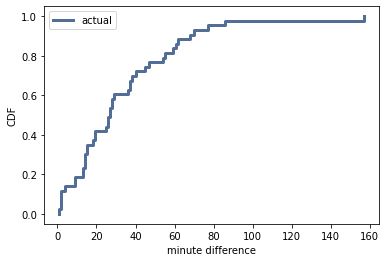

<Figure size 576x432 with 0 Axes>

In [31]:
# plot the differences in a cdf
cdf = thinkstats2.Cdf(diffs, label='actual')

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='minute difference', ylabel='CDF')